##  Major Research Project 
### by Abhishek Chaurah under the supervision of Dr. Ravi Vatrapu
### Toronto Metropolitan University

#  

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import time 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,13]

import seaborn as sns
%matplotlib inline


In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

### Since I'm going to do exploratory data analysis on the 2021 data, I'll load the following datasets:

In [4]:
#Reading 2021 Datasets
m1_2021 = pd.read_csv('Bike share ridership 2021-01.csv')
m2_2021 = pd.read_csv('Bike share ridership 2021-02.csv')
m3_2021 = pd.read_csv('Bike share ridership 2021-03.csv')
m4_2021 = pd.read_csv('Bike share ridership 2021-04.csv')
m5_2021 = pd.read_csv('Bike share ridership 2021-05.csv')
m6_2021 = pd.read_csv('Bike share ridership 2021-06.csv')
m7_2021 = pd.read_csv('Bike share ridership 2021-07.csv')
m8_2021 = pd.read_csv('Bike share ridership 2021-08.csv')
m9_2021 = pd.read_csv('Bike share ridership 2021-09.csv')
m10_2021 = pd.read_csv('Bike share ridership 2021-10.csv')
m11_2021 = pd.read_csv('Bike share ridership 2021-11.csv')
m12_2021 = pd.read_csv('Bike share ridership 2021-12.csv')

In [5]:
m1_2021.count()

Trip Id               86371
Trip  Duration        86371
Start Station Id      86371
Start Time            86371
Start Station Name    86069
End Station Id        86058
End Time              86371
End Station Name      85759
Bike Id               86168
User Type             86371
dtype: int64

### Let's concatenate and see the head of the DataFrame:

In [6]:
# Concating the months of 2021 bike share dataset into one.
toronto_2021 = [m1_2021, m2_2021, m3_2021, m4_2021, m5_2021, m6_2021, m7_2021, m8_2021, m9_2021, m10_2021, m11_2021, m12_2021, ]
bike_share_2021 = pd.concat(toronto_2021)
bike_share_2021.count()

Trip Id               3575182
Trip  Duration        3575182
Start Station Id      3575182
Start Time            3575182
Start Station Name    3571502
End Station Id        3573213
End Time              3575182
End Station Name      3569288
Bike Id               3574979
User Type             3575182
dtype: int64

In [7]:
bike_share_2021.head(10)

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,10644218,1315,7021,01/01/2021 00:04,Bay St / Albert St,7164.0,01/01/2021 00:26,Gould St / Yonge St (Ryerson University),6795.0,Annual Member
1,10644220,396,7534,01/01/2021 00:07,Walnut Ave / Queen St W,7524.0,01/01/2021 00:13,Lisgar Park,4176.0,Casual Member
2,10644221,86,7162,01/01/2021 00:10,Hayter St / Laplante Ave,7006.0,01/01/2021 00:11,Bay St / College St (East Side),1814.0,Annual Member
3,10644222,741,7003,01/01/2021 00:10,Madison Ave / Bloor St W,7272.0,01/01/2021 00:22,Yonge St / Dundonald St - SMART,198.0,Casual Member
4,10644223,2073,7562,01/01/2021 00:11,Priscilla Ave / Dundas St W - SMART,7562.0,01/01/2021 00:45,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member
5,10644224,1924,7442,01/01/2021 00:11,Lonsdale Rd / Spadina Rd,7256.0,01/01/2021 00:43,Vanauley St / Queen St W - SMART,196.0,Annual Member
6,10644225,473,7006,01/01/2021 00:12,Bay St / College St (East Side),7025.0,01/01/2021 00:19,Ted Rogers Way / Bloor St E,6882.0,Annual Member
7,10644226,265,7014,01/01/2021 00:13,Sherbourne St / Carlton St (Allan Gardens),7508.0,01/01/2021 00:17,Berkeley St / Dundas St E - SMART,6485.0,Annual Member
8,10644227,1079,7053,01/01/2021 00:13,Metro Hall Plaza,7079.0,01/01/2021 00:31,McGill St / Church St,5791.0,Casual Member
9,10644228,981,7528,01/01/2021 00:15,Spadina Rd / Austin Terrace - SMART,7481.0,01/01/2021 00:31,Westmount Ave / St Clair Ave W - SMART,2951.0,Casual Member


# Shows columns and data type

In [8]:
bike_share_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575182 entries, 0 to 145848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Trip Id             int64  
 1   Trip  Duration      int64  
 2   Start Station Id    int64  
 3   Start Time          object 
 4   Start Station Name  object 
 5   End Station Id      float64
 6   End Time            object 
 7   End Station Name    object 
 8   Bike Id             float64
 9   User Type           object 
dtypes: float64(2), int64(3), object(5)
memory usage: 300.0+ MB


### Let's perform Data Wrangling

In [9]:
# Check for duplicates
print(f"""Duplicates found in 2021 bikeshare dataset: {bike_share_2021.duplicated().sum()}""")

Duplicates found in 2021 bikeshare dataset: 0


In [10]:
# Final check for null values
print(f"""
**2021 dataset**\n
Total Number of Null values:\n\n{bike_share_2021.isna().sum()}\n
Total Percentage of Null values:\n\n{bike_share_2021.isna().mean()*100}""")


**2021 dataset**

Total Number of Null values:

Trip Id                  0
Trip  Duration           0
Start Station Id         0
Start Time               0
Start Station Name    3680
End Station Id        1969
End Time                 0
End Station Name      5894
Bike Id                203
User Type                0
dtype: int64

Total Percentage of Null values:

Trip Id               0.000000
Trip  Duration        0.000000
Start Station Id      0.000000
Start Time            0.000000
Start Station Name    0.102932
End Station Id        0.055074
End Time              0.000000
End Station Name      0.164859
Bike Id               0.005678
User Type             0.000000
dtype: float64


In [11]:
bike_share_2021.fillna(method='ffill', inplace=True)

In [12]:
# Final check for null values
print(f"""
**2021 Bike Share Dataset**\n
Total Number of Null values:\n\n{bike_share_2021.isna().sum()}\
""")


**2021 Bike Share Dataset**

Total Number of Null values:

Trip Id               0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64


### Before moving forward with the EDA, I'm going to convert the objects into DateTime format:

In [13]:
bike_share_2021['Start Time'] = pd.to_datetime(bike_share_2021['Start Time'])
bike_share_2021['End Time'] = pd.to_datetime(bike_share_2021['End Time'])

### Now I'm going to extract the hour, month and day of the week from both columns:

In [14]:
bike_share_2021['hour_start'] = bike_share_2021['Start Time'].apply(lambda time: time.hour)
bike_share_2021['month_start'] = bike_share_2021['Start Time'].apply(lambda time: time.month)
bike_share_2021['weekday_start'] = bike_share_2021['Start Time'].apply(lambda time: time.dayofweek)

In [15]:
bike_share_2021['hour_stop'] = bike_share_2021['End Time'].apply(lambda time: time.hour)
bike_share_2021['month_stop'] = bike_share_2021['End Time'].apply(lambda time: time.month)
bike_share_2021['weekday_stop'] = bike_share_2021['End Time'].apply(lambda time: time.dayofweek)

In [16]:
mon = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_share_2021['month_start'] = bike_share_2021['month_start'].map(mon)
bike_share_2021['month_stop'] = bike_share_2021['month_stop'].map(mon)

In [17]:
bike_share_2021

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,10644218,1315,7021,2021-01-01 00:04:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,0,Jan,4,0,Jan,4
1,10644220,396,7534,2021-01-01 00:07:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00,Lisgar Park,4176.0,Casual Member,0,Jan,4,0,Jan,4
2,10644221,86,7162,2021-01-01 00:10:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00,Bay St / College St (East Side),1814.0,Annual Member,0,Jan,4,0,Jan,4
3,10644222,741,7003,2021-01-01 00:10:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00,Yonge St / Dundonald St - SMART,198.0,Casual Member,0,Jan,4,0,Jan,4
4,10644223,2073,7562,2021-01-01 00:11:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,0,Jan,4,0,Jan,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145844,14805103,372,7065,2021-12-31 23:56:00,Dundas St E / Parliament St,7472.0,2022-01-01 00:02:00,Dundas St E / Victoria St,3487.0,Casual Member,23,Dec,4,0,Jan,5
145845,14805104,762,7233,2021-12-31 23:56:00,King / Cowan Ave - SMART,7569.0,2022-01-01 00:08:00,Toronto Inukshuk Park,4195.0,Annual Member,23,Dec,4,0,Jan,5
145846,14805105,355,7065,2021-12-31 23:56:00,Dundas St E / Parliament St,7472.0,2022-01-01 00:02:00,Dundas St E / Victoria St,4574.0,Casual Member,23,Dec,4,0,Jan,5
145847,14805107,770,7292,2021-12-31 23:56:00,Granby St / Church St - SMART,7076.0,2022-01-01 00:09:00,York St / Queens Quay W,5879.0,Annual Member,23,Dec,4,0,Jan,5


In [18]:
bike_share_2021['User Type'].value_counts(sort=True)

Annual Member    2140730
Casual Member    1434452
Name: User Type, dtype: int64

In [19]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_share_2021['weekday_start'] = bike_share_2021['weekday_start'].map(day)
bike_share_2021['weekday_stop'] = bike_share_2021['weekday_stop'].map(day)

In [20]:
#Here is the head of the DataFrame
bike_share_2021.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,10644218,1315,7021,2021-01-01 00:04:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,0,Jan,Fri,0,Jan,Fri
1,10644220,396,7534,2021-01-01 00:07:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00,Lisgar Park,4176.0,Casual Member,0,Jan,Fri,0,Jan,Fri
2,10644221,86,7162,2021-01-01 00:10:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00,Bay St / College St (East Side),1814.0,Annual Member,0,Jan,Fri,0,Jan,Fri
3,10644222,741,7003,2021-01-01 00:10:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00,Yonge St / Dundonald St - SMART,198.0,Casual Member,0,Jan,Fri,0,Jan,Fri
4,10644223,2073,7562,2021-01-01 00:11:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,0,Jan,Fri,0,Jan,Fri


# TESTING

In [21]:
bike_share_2021

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop
0,10644218,1315,7021,2021-01-01 00:04:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,0,Jan,Fri,0,Jan,Fri
1,10644220,396,7534,2021-01-01 00:07:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00,Lisgar Park,4176.0,Casual Member,0,Jan,Fri,0,Jan,Fri
2,10644221,86,7162,2021-01-01 00:10:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00,Bay St / College St (East Side),1814.0,Annual Member,0,Jan,Fri,0,Jan,Fri
3,10644222,741,7003,2021-01-01 00:10:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00,Yonge St / Dundonald St - SMART,198.0,Casual Member,0,Jan,Fri,0,Jan,Fri
4,10644223,2073,7562,2021-01-01 00:11:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,0,Jan,Fri,0,Jan,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145844,14805103,372,7065,2021-12-31 23:56:00,Dundas St E / Parliament St,7472.0,2022-01-01 00:02:00,Dundas St E / Victoria St,3487.0,Casual Member,23,Dec,Fri,0,Jan,Sat
145845,14805104,762,7233,2021-12-31 23:56:00,King / Cowan Ave - SMART,7569.0,2022-01-01 00:08:00,Toronto Inukshuk Park,4195.0,Annual Member,23,Dec,Fri,0,Jan,Sat
145846,14805105,355,7065,2021-12-31 23:56:00,Dundas St E / Parliament St,7472.0,2022-01-01 00:02:00,Dundas St E / Victoria St,4574.0,Casual Member,23,Dec,Fri,0,Jan,Sat
145847,14805107,770,7292,2021-12-31 23:56:00,Granby St / Church St - SMART,7076.0,2022-01-01 00:09:00,York St / Queens Quay W,5879.0,Annual Member,23,Dec,Fri,0,Jan,Sat


In [22]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score


In [23]:
numerical_column = bike_share_2021.select_dtypes(exclude="object").columns.tolist()
categorical_column = bike_share_2021.select_dtypes(include="object").columns.tolist()
print("Numerical Columns:", numerical_column)
print("****************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'End Station Id', 'End Time', 'Bike Id', 'hour_start', 'hour_stop']
****************
Categorical Columns: ['Start Station Name', 'End Station Name', 'User Type', 'month_start', 'weekday_start', 'month_stop', 'weekday_stop']


In [24]:
bike_share_2021["Count"]=bike_share_2021["Trip  Duration"].apply(lambda x:1 if(x>1040) else 0)

In [26]:
#y_train

In [28]:
#y_train=y_train.apply(lambda x:1 if(x=="Annual Member") else 0)

In [29]:
#y_test=y_test.apply(lambda x:1 if(x=="Annual Member") else 0)

In [30]:
target="User Type"

In [31]:
# Get column names have less than 10 more than 2 unique values
to_one_hot_encoding = [col for col in categorical_column if bike_share_2021[col].nunique() <= 10 and bike_share_2021[col].nunique() > 2]

# Get Categorical Column names thoose are not in "to_one_hot_encoding"
to_label_encoding = [col for col in categorical_column if not col in to_one_hot_encoding]

print("To One Hot Encoding:", to_one_hot_encoding)
print("To Label Encoding:", to_label_encoding)

To One Hot Encoding: ['weekday_start', 'weekday_stop']
To Label Encoding: ['Start Station Name', 'End Station Name', 'User Type', 'month_start', 'month_stop']


In [32]:
# We will use built in pandas function "get_dummies()" to simply to encode "to_one_hot_encoding" columns
one_hot_encoded_columns = pd.get_dummies(bike_share_2021[to_one_hot_encoding])
one_hot_encoded_columns

,weekday_start_Fri,weekday_start_Mon,weekday_start_Sat,weekday_start_Sun,weekday_start_Thu,weekday_start_Tue,weekday_start_Wed,weekday_stop_Fri,weekday_stop_Mon,weekday_stop_Sat,weekday_stop_Sun,weekday_stop_Thu,weekday_stop_Tue,weekday_stop_Wed
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145844,1,0,0,0,0,0,0,0,0,1,0,0,0,0
145845,1,0,0,0,0,0,0,0,0,1,0,0,0,0
145846,1,0,0,0,0,0,0,0,0,1,0,0,0,0
145847,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [33]:
# Label Encoding

label_encoded_columns = []
# For loop for each columns
for col in to_label_encoding:
    # We define new label encoder to each new column
    le = LabelEncoder()
    # Encode our data and create new Dataframe of it, 
    # notice that we gave column name in "columns" arguments
    column_dataframe = pd.DataFrame(le.fit_transform(bike_share_2021[col]), columns=[col] )
    # and add new DataFrame to "label_encoded_columns" list
    label_encoded_columns.append(column_dataframe)

# Merge all data frames
label_encoded_columns = pd.concat(label_encoded_columns, axis=1)
label_encoded_columns

,Start Station Name,End Station Name,User Type,month_start,month_stop
0,64,302,0,4,4
1,678,407,1,4,4
2,310,69,0,4,4
3,426,722,1,4,4
4,491,493,1,4,4
...,...,...,...,...,...
3575177,203,207,1,2,4
3575178,359,646,0,2,4
3575179,203,207,1,2,4
3575180,301,736,0,2,4


In [34]:
one_hot_encoded_columns

,weekday_start_Fri,weekday_start_Mon,weekday_start_Sat,weekday_start_Sun,weekday_start_Thu,weekday_start_Tue,weekday_start_Wed,weekday_stop_Fri,weekday_stop_Mon,weekday_stop_Sat,weekday_stop_Sun,weekday_stop_Thu,weekday_stop_Tue,weekday_stop_Wed
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145844,1,0,0,0,0,0,0,0,0,1,0,0,0,0
145845,1,0,0,0,0,0,0,0,0,1,0,0,0,0
145846,1,0,0,0,0,0,0,0,0,1,0,0,0,0
145847,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [35]:
label_encoded_columns

,Start Station Name,End Station Name,User Type,month_start,month_stop
0,64,302,0,4,4
1,678,407,1,4,4
2,310,69,0,4,4
3,426,722,1,4,4
4,491,493,1,4,4
...,...,...,...,...,...
3575177,203,207,1,2,4
3575178,359,646,0,2,4
3575179,203,207,1,2,4
3575180,301,736,0,2,4


In [36]:
label_encoded_columns=label_encoded_columns.reset_index()

In [37]:
bike_share_2021 = bike_share_2021.reset_index(drop=True)

In [50]:
X = X.drop('Start Time', axis=1)


In [51]:
X = X.drop('End Time', axis=1)


In [52]:
X.dtypes

Trip Id               int64
Trip  Duration        int64
Start Station Id      int64
End Station Id      float64
Bike Id             float64
hour_start            int64
hour_stop             int64
Count                 int64
dtype: object

In [54]:
X

,Trip Id,Trip Duration,Start Station Id,Start Time,End Station Id,End Time,Bike Id,hour_start,hour_stop,Count
0,10644218,1315,7021,2021-01-01 00:04:00,7164.0,2021-01-01 00:26:00,6795.0,0,0,1
1,10644220,396,7534,2021-01-01 00:07:00,7524.0,2021-01-01 00:13:00,4176.0,0,0,0
2,10644221,86,7162,2021-01-01 00:10:00,7006.0,2021-01-01 00:11:00,1814.0,0,0,0
3,10644222,741,7003,2021-01-01 00:10:00,7272.0,2021-01-01 00:22:00,198.0,0,0,0
4,10644223,2073,7562,2021-01-01 00:11:00,7562.0,2021-01-01 00:45:00,6688.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3575177,14805103,372,7065,2021-12-31 23:56:00,7472.0,2022-01-01 00:02:00,3487.0,23,0,0
3575178,14805104,762,7233,2021-12-31 23:56:00,7569.0,2022-01-01 00:08:00,4195.0,23,0,0
3575179,14805105,355,7065,2021-12-31 23:56:00,7472.0,2022-01-01 00:02:00,4574.0,23,0,0
3575180,14805107,770,7292,2021-12-31 23:56:00,7076.0,2022-01-01 00:09:00,5879.0,23,0,0


In [199]:
# Copy our DataFrame to X variable
X = bike_share_2021.copy()

# Droping Categorical Columns,
# "inplace" means replace our data with new one
# Don't forget to "axis=1"
X.drop(categorical_column, axis=1, inplace=True)

# Merge DataFrames
Y = pd.concat([one_hot_encoded_columns,label_encoded_columns], axis=1)
Z = pd.concat([X,Y], axis=1)
print("All columns:", Z.columns.tolist())
X=Z
X

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [55]:
bike_share_2021.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop,Count
0,10644218,1315,7021,2021-01-01 00:04:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,0,Jan,Fri,0,Jan,Fri,1
1,10644220,396,7534,2021-01-01 00:07:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00,Lisgar Park,4176.0,Casual Member,0,Jan,Fri,0,Jan,Fri,0
2,10644221,86,7162,2021-01-01 00:10:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00,Bay St / College St (East Side),1814.0,Annual Member,0,Jan,Fri,0,Jan,Fri,0
3,10644222,741,7003,2021-01-01 00:10:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00,Yonge St / Dundonald St - SMART,198.0,Casual Member,0,Jan,Fri,0,Jan,Fri,0
4,10644223,2073,7562,2021-01-01 00:11:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,0,Jan,Fri,0,Jan,Fri,1


In [197]:
# Define Y (This is the value we will predict)
#y = bike_share_2021["User Type"]

# Droping "class" from X
#X.drop(["User Type"], axis=1, inplace=True)
X

,Trip Id,Trip Duration,Start Station Id,Start Time,End Station Id,End Time,Bike Id,hour_start,hour_stop,Count
0,10644218,1315,7021,2021-01-01 00:04:00,7164.0,2021-01-01 00:26:00,6795.0,0,0,1
1,10644220,396,7534,2021-01-01 00:07:00,7524.0,2021-01-01 00:13:00,4176.0,0,0,0
2,10644221,86,7162,2021-01-01 00:10:00,7006.0,2021-01-01 00:11:00,1814.0,0,0,0
3,10644222,741,7003,2021-01-01 00:10:00,7272.0,2021-01-01 00:22:00,198.0,0,0,0
4,10644223,2073,7562,2021-01-01 00:11:00,7562.0,2021-01-01 00:45:00,6688.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3575177,14805103,372,7065,2021-12-31 23:56:00,7472.0,2022-01-01 00:02:00,3487.0,23,0,0
3575178,14805104,762,7233,2021-12-31 23:56:00,7569.0,2022-01-01 00:08:00,4195.0,23,0,0
3575179,14805105,355,7065,2021-12-31 23:56:00,7472.0,2022-01-01 00:02:00,4574.0,23,0,0
3575180,14805107,770,7292,2021-12-31 23:56:00,7076.0,2022-01-01 00:09:00,5879.0,23,0,0


In [57]:
# You can specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [202]:
#X_train['Start_Time']=X_train['Start_Time'].dt.date

In [203]:
#X_train['Start Time'].astype(float)

In [204]:
#X['End_Time'].astype(str)

In [205]:
#y_train['Start_Time'] = y_train['Start_Time'].astype('str')

In [206]:
#X_train['End Time'] = X_train['End Time'].astype('str')

In [58]:
X_train=X_train.drop(labels=["Start Time", "End Time"], axis=1)


In [59]:
y_train=y_train.apply(lambda x:1 if(x=="Annual Member") else 0)
y_test=y_test.apply(lambda x:1 if(x=="Annual Member") else 0)

In [60]:
X_test=X_test.drop(labels=["Start Time", "End Time"], axis=1)

In [61]:
X_test.head()

,Trip Id,Trip Duration,Start Station Id,End Station Id,Bike Id,hour_start,hour_stop,Count
2138235,13134813,359,7029,7003.0,2365.0,23,23,0
2668472,13741558,231,7388,7117.0,3869.0,17,17,0
625187,11402670,1681,7175,7175.0,5112.0,16,16,1
2031583,13013344,326,7271,7462.0,562.0,16,16,0
2386996,13419835,668,7094,7349.0,6564.0,15,15,0


In [62]:
X_train.head()

,Trip Id,Trip Duration,Start Station Id,End Station Id,Bike Id,hour_start,hour_stop,Count
3358631,14550556,481,7222,7289.0,6019.0,17,17,0
2019505,12998549,1119,7020,7049.0,3020.0,16,16,1
3233335,14404113,370,7288,7516.0,5942.0,19,19,0
941896,11758968,460,7252,7252.0,5937.0,14,14,0
588052,11357632,1346,7175,7226.0,5542.0,15,15,1


In [63]:
y_train.head()

3358631    0
2019505    0
3233335    1
941896     0
588052     1
Name: User Type, dtype: int64

In [68]:
# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 1 0 1 1 1 1 1 1 1]
Actual: 2138235    1
2668472    1
625187     1
2031583    1
2386996    1
2179558    1
2558096    0
540044     1
957257     1
2056860    1
Name: User Type, dtype: int64


In [67]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 0 0 1 1 0 1 1 0 1]
Actual: 2138235    1
2668472    1
625187     1
2031583    1
2386996    1
2179558    1
2558096    0
540044     1
957257     1
2056860    1
Name: User Type, dtype: int64


In [69]:
bike_share_2021

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,hour_start,month_start,weekday_start,hour_stop,month_stop,weekday_stop,Count
0,10644218,1315,7021,2021-01-01 00:04:00,Bay St / Albert St,7164.0,2021-01-01 00:26:00,Gould St / Yonge St (Ryerson University),6795.0,Annual Member,0,Jan,Fri,0,Jan,Fri,1
1,10644220,396,7534,2021-01-01 00:07:00,Walnut Ave / Queen St W,7524.0,2021-01-01 00:13:00,Lisgar Park,4176.0,Casual Member,0,Jan,Fri,0,Jan,Fri,0
2,10644221,86,7162,2021-01-01 00:10:00,Hayter St / Laplante Ave,7006.0,2021-01-01 00:11:00,Bay St / College St (East Side),1814.0,Annual Member,0,Jan,Fri,0,Jan,Fri,0
3,10644222,741,7003,2021-01-01 00:10:00,Madison Ave / Bloor St W,7272.0,2021-01-01 00:22:00,Yonge St / Dundonald St - SMART,198.0,Casual Member,0,Jan,Fri,0,Jan,Fri,0
4,10644223,2073,7562,2021-01-01 00:11:00,Priscilla Ave / Dundas St W - SMART,7562.0,2021-01-01 00:45:00,Priscilla Ave / Dundas St W - SMART,6688.0,Casual Member,0,Jan,Fri,0,Jan,Fri,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575177,14805103,372,7065,2021-12-31 23:56:00,Dundas St E / Parliament St,7472.0,2022-01-01 00:02:00,Dundas St E / Victoria St,3487.0,Casual Member,23,Dec,Fri,0,Jan,Sat,0
3575178,14805104,762,7233,2021-12-31 23:56:00,King / Cowan Ave - SMART,7569.0,2022-01-01 00:08:00,Toronto Inukshuk Park,4195.0,Annual Member,23,Dec,Fri,0,Jan,Sat,0
3575179,14805105,355,7065,2021-12-31 23:56:00,Dundas St E / Parliament St,7472.0,2022-01-01 00:02:00,Dundas St E / Victoria St,4574.0,Casual Member,23,Dec,Fri,0,Jan,Sat,0
3575180,14805107,770,7292,2021-12-31 23:56:00,Granby St / Church St - SMART,7076.0,2022-01-01 00:09:00,York St / Queens Quay W,5879.0,Annual Member,23,Dec,Fri,0,Jan,Sat,0


In [70]:
acc_rf = accuracy_score(y_test, pred_rf)
acc_rf

0.7360814571147413

In [66]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X_train, y_train)
# Then predict results from X_test data
pred_log = log.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 1 1 1 1 1 1 1 1 1]
Actual: 2138235    1
2668472    1
625187     1
2031583    1
2386996    1
2179558    1
2558096    0
540044     1
957257     1
2056860    1
Name: User Type, dtype: int64


In [64]:
# Define Bernouilli Naive Bias Model
bnb = BernoulliNB()
# We fit our model with our train data
bnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_bnb = bnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_bnb[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 1 0 1 1 1 1 1 1 1]
Actual: 2138235    1
2668472    1
625187     1
2031583    1
2386996    1
2179558    1
2558096    0
540044     1
957257     1
2056860    1
Name: User Type, dtype: int64


In [65]:
# Define Gaussian Naive Bias Model
gnb = GaussianNB()
# We fit our model with our train data
gnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_gnb = gnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_gnb[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 1 1 1 1 1 1 1 1 1]
Actual: 2138235    1
2668472    1
625187     1
2031583    1
2386996    1
2179558    1
2558096    0
540044     1
957257     1
2056860    1
Name: User Type, dtype: int64


In [71]:
# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_knn[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 0 1 1 1 1 0 1 1 1]
Actual: 2138235    1
2668472    1
625187     1
2031583    1
2386996    1
2179558    1
2558096    0
540044     1
957257     1
2056860    1
Name: User Type, dtype: int64


In [72]:
#y_train=y_train.apply(lambda x:1 if(x=="Annual Member") else 0)
#y_test=y_test.apply(lambda x:1 if(x=="Annual Member") else 0)

In [80]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=20, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X_train, y_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X_test, y_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Actual:", y_test[0:10])
print("Predicted:", pred_xgb[0:10])

Actual: 2138235    1
2668472    1
625187     1
2031583    1
2386996    1
2179558    1
2558096    0
540044     1
957257     1
2056860    1
Name: User Type, dtype: int64
Predicted: [1 1 0 1 1 1 1 1 1 1]


In [81]:
acc_xgb = accuracy_score(y_test, pred_xgb)
acc_xgb

0.7014979517905834

In [82]:
# Confusion Matrixes
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
cm_rf = confusion_matrix(y_test, pred_rf)
# Desicion Tree
cm_dt = confusion_matrix(y_test, pred_dt)
# Logistic Regression
cm_log = confusion_matrix(y_test, pred_log)
# Bernouilli Naive Bias
cm_bnb = confusion_matrix(y_test, pred_bnb)
# Gaussian Naive Bias
cm_gnb = confusion_matrix(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
cm_knn = confusion_matrix(y_test, pred_knn)
# XGBoost 
cm_xgb = confusion_matrix(y_test, pred_xgb)

print("***********************")
print("Confusion Matrixes")
print("***********************")
print("Random Forest:\n", cm_rf)
print("Desicion Tree:\n", cm_dt)
print("Logistic Regression:\n", cm_log)
print("Bernouilli Naive Bias:\n", cm_bnb)
print("Gaussian Naive Bias:\n", cm_gnb)
print("KNN (K-Nearest Neighbors):\n", cm_knn)
print("XGBoost:\n", cm_xgb)

***********************
Confusion Matrixes
***********************
Random Forest:
 [[292882 180371]
 [131003 575555]]
Desicion Tree:
 [[274814 198439]
 [208048 498510]]
Logistic Regression:
 [[     0 473253]
 [     0 706558]]
Bernouilli Naive Bias:
 [[225159 248094]
 [163859 542699]]
Gaussian Naive Bias:
 [[ 15804 457449]
 [  1317 705241]]
KNN (K-Nearest Neighbors):
 [[255772 217481]
 [185506 521052]]
XGBoost:
 [[259054 214199]
 [137977 568581]]


In [83]:
# Accuracy Scores
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
acc_rf = accuracy_score(y_test, pred_rf)
# Desicion Tree
acc_dt = accuracy_score(y_test, pred_dt)
# Logistic Regression
acc_log = accuracy_score(y_test, pred_log)
# Bernouilli Naive Bias
acc_bnb = accuracy_score(y_test, pred_bnb)
# Gaussian Naive Bias
acc_gnb = accuracy_score(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
acc_knn = accuracy_score(y_test, pred_knn)
# XGBoost 
acc_xgb = accuracy_score(y_test, pred_xgb)

print("***********************")
print("Accuracy Scores")
print("***********************")
print("Random Forest:", acc_rf)
print("Desicion Tree:", acc_dt)
print("Logistic Regression:", acc_log)
print("Bernouilli Naive Bias:", acc_bnb)
print("Gaussian Naive Bias:", acc_gnb)
print("KNN (K-Nearest Neighbors):", acc_knn)
print("XGBoost:", acc_xgb)

***********************
Accuracy Scores
***********************
Random Forest: 0.7360814571147413
Desicion Tree: 0.6554643074187306
Logistic Regression: 0.5988738874277321
Bernouilli Naive Bias: 0.6508313619723837
Gaussian Naive Bias: 0.6111529728066614
KNN (K-Nearest Neighbors): 0.6584308842687515
XGBoost: 0.7014979517905834


In [84]:

# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15,7]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [85]:
plt.style.use('dark_background')

<BarContainer object of 7 artists>

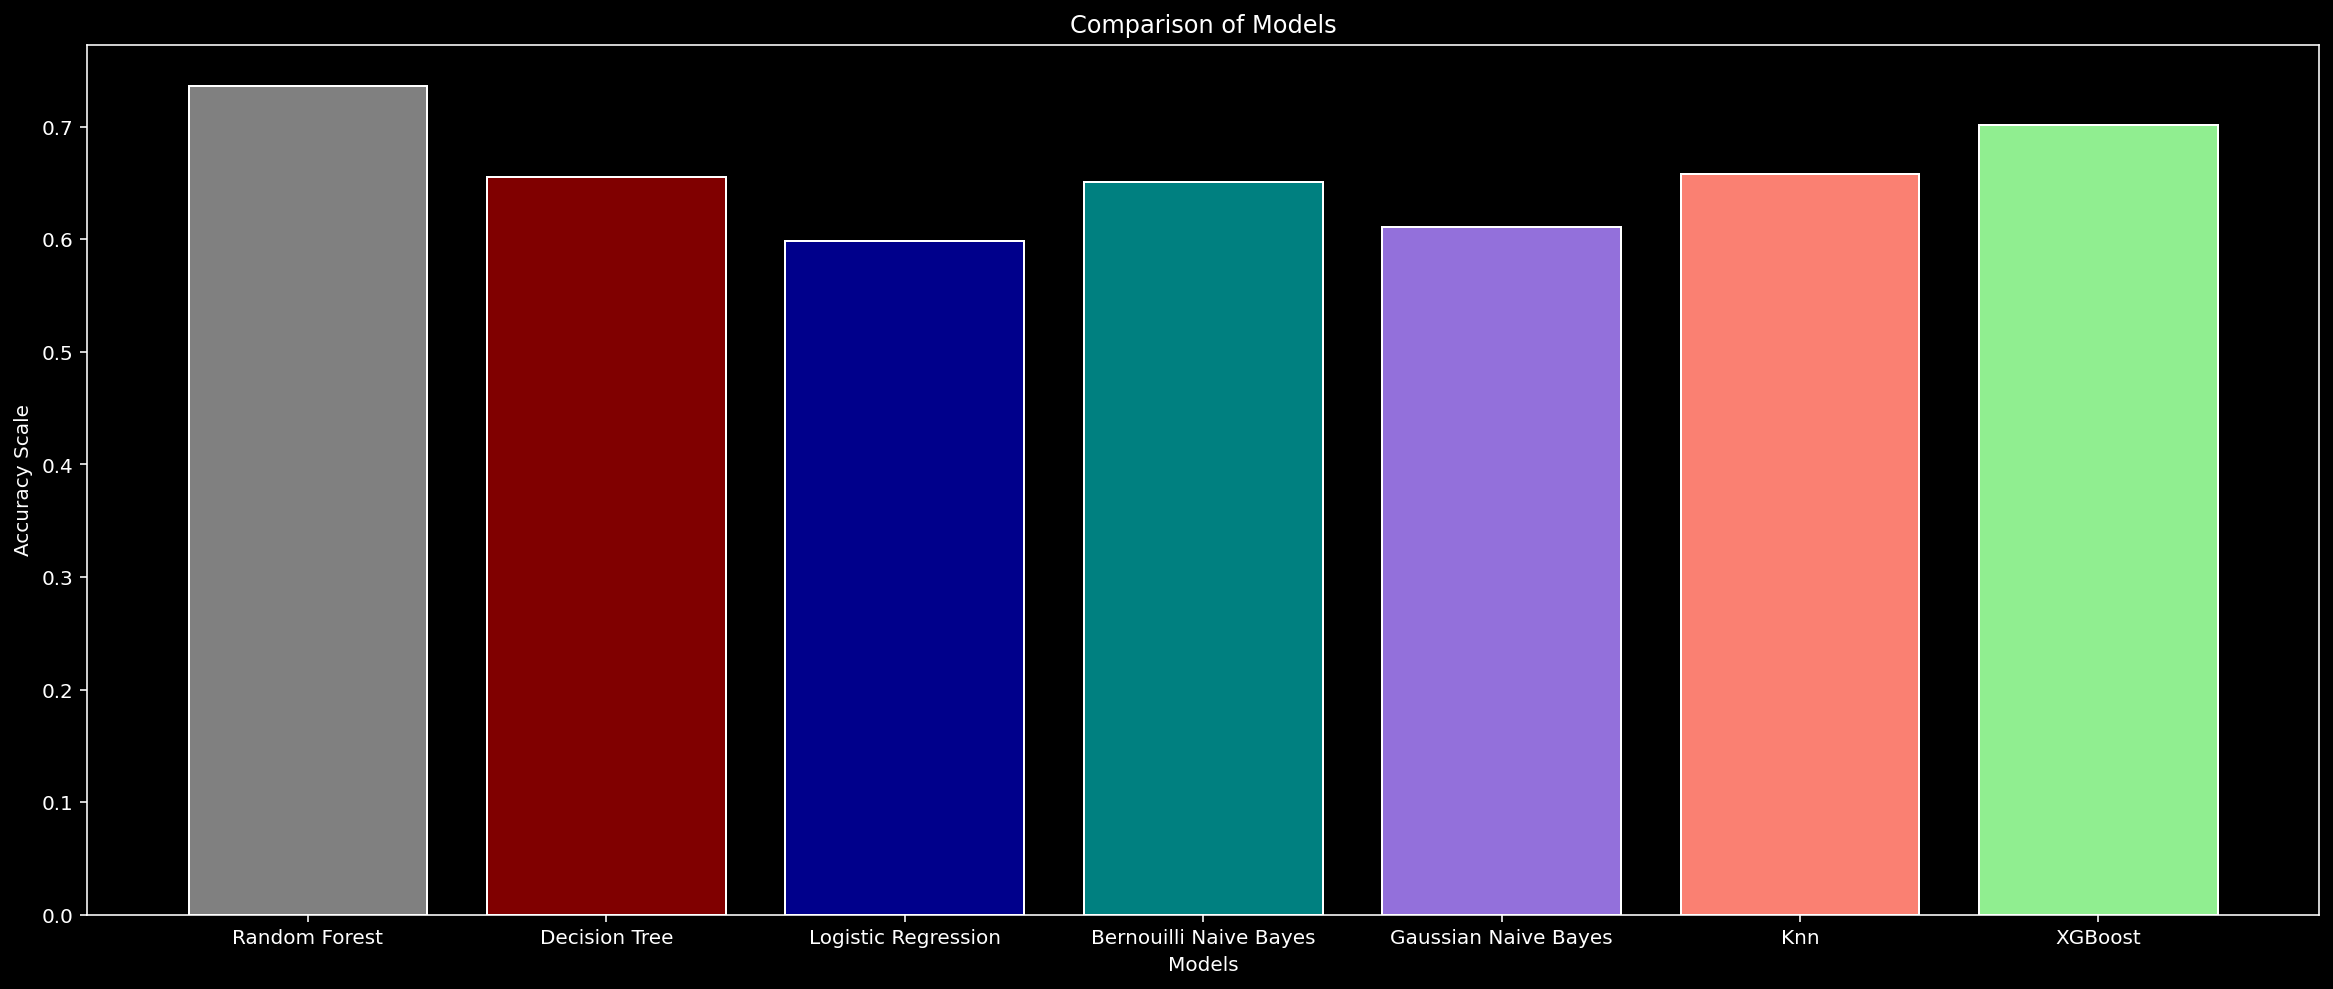

In [92]:
model_name=['Random Forest','Decision Tree','Logistic Regression','Bernouilli Naive Bayes','Gaussian Naive Bayes','Knn','XGBoost']
accuracy=[acc_rf,acc_dt,acc_log,acc_bnb,acc_gnb,acc_knn,acc_xgb]
plt.figure(figsize=(20,8))
color=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")
plt.title("Comparison of Models")
plt.xlabel("Models")
plt.ylabel("Accuracy Scale")
plt.bar(model_name, accuracy, color=color,edgecolor='white')

In [128]:
#Random Forest
acc_rf = accuracy_score(y_test, pred_rf)
# Desicion Tree
acc_dt = accuracy_score(y_test, pred_dt)
# Logistic Regression
acc_log = accuracy_score(y_test, pred_log)
# Bernouilli Naive Bias
acc_bnb = accuracy_score(y_test, pred_bnb)
# Gaussian Naive Bias
acc_gnb = accuracy_score(y_test, pred_gnb)
#KNN
acc_knn=accuracy_score(y_test, pred_knn)
#XGBoost 
acc_xgb = accuracy_score(y_test, pred_xgb)
predictions=[pred_rf,pred_dt,pred_log,pred_bnb,pred_gnb,pred_knn,pred_xgb]

In [106]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# print precision value of model
print("*******Random Forest******")
precision_rf=precision_score(y_test, pred_rf)
print('Precision Score: ', precision_score(y_test, pred_rf))

# print recall value of model
recall_rf=recall_score(y_test, pred_rf)
print('Recall Score: ', recall_score(y_test, pred_rf))
f1_rf=f1_score(y_test, pred_rf)
print("F1 Score: ", f1_score(y_test, pred_rf))
print("         ")
## precision_rf=precision_score(y_test, pred_rf)        recall_rf=recall_score(y_test, pred_rf)                 f1_rf=f1_score(y_test, pred_rf)    

# print precision value of model
print("*******Decision Tree******")
precision_dt=precision_score(y_test, pred_dt)        
print('Precision Score: ', precision_score(y_test, pred_dt))

# print recall value of model
recall_dt=recall_score(y_test, pred_dt)             
print('Recall Score: ', recall_score(y_test, pred_dt))
f1_dt=f1_score(y_test, pred_dt) 
print("F1 Score: ", f1_score(y_test, pred_dt))
print("         ")


# print precision value of model
print("*******Logistic Regression******")
precision_log=precision_score(y_test, pred_log)      
print('Precision Score: ', precision_score(y_test, pred_log))

# print recall value of model
recall_log=recall_score(y_test, pred_log)           
f1_log=f1_score(y_test, pred_log)      
print('Recall Score: ', recall_score(y_test, pred_log))
print("F1 Score: ", f1_score(y_test, pred_log))
print("         ")


# print precision value of model
print("*******Bernouilli Naive Bayes******")
precision_bnb=precision_score(y_test, pred_bnb)
recall_bnb=recall_score(y_test, pred_bnb)           
f1_bnb=f1_score(y_test, pred_bnb)
print('Precision Score: ', precision_score(y_test, pred_bnb))

# print recall value of model
print('Recall Score: ', recall_score(y_test, pred_bnb))
print("F1 Score: ", f1_score(y_test, pred_bnb))
print("         ")


# print precision value of model
print("*******Gaussain Naive Bayes******")
precision_gnb=precision_score(y_test, pred_gnb)
recall_gnb=recall_score(y_test, pred_gnb)           
f1_gnb=f1_score(y_test, pred_gnb)
print('Precision Score: ', precision_score(y_test, pred_gnb))

# print recall value of model
print('Recall Score: ', recall_score(y_test, pred_gnb))
print("F1 Score: ", f1_score(y_test, pred_gnb))
print("         ")

# print precision value of model
precision_knn=precision_score(y_test, pred_knn)
recall_knn=recall_score(y_test, pred_knn)           
f1_knn=f1_score(y_test, pred_knn)
print("*******KNN******")
print('Precision Score: ', precision_score(y_test, pred_knn))

# print recall value of model
print('Recall Score: ', recall_score(y_test, pred_knn))
print("F1 Score: ", f1_score(y_test, pred_knn))
print("         ")

# print precision value of model
precision_xgb=precision_score(y_test, pred_xgb)
recall_xgb=recall_score(y_test, pred_xgb)           
f1_xgb=f1_score(y_test, pred_xgb)
print("*******XGBoost******")
print('Precision Score: ', precision_score(y_test, pred_xgb))

# print recall value of model
print('Recall Score: ', recall_score(y_test, pred_xgb))
print("F1 Score: ", f1_score(y_test, pred_xgb))
print("         ")

*******Random Forest******
Precision Score:  0.7613906652238447
Recall Score:  0.8145898850483612
F1 Score:  0.7870923716088517
         
*******Decision Tree******
Precision Score:  0.7152747188101282
Recall Score:  0.7055471737635127
F1 Score:  0.7103776468517792
         
*******Logistic Regression******
Precision Score:  0.5988738874277321
Recall Score:  1.0
F1 Score:  0.7491196049129306
         
*******Bernouilli Naive Bayes******
Precision Score:  0.6862718815164018
Recall Score:  0.7680883947248492
F1 Score:  0.724878802632115
         
*******Gaussain Naive Bayes******
Precision Score:  0.6065597880776475
Recall Score:  0.9981360341260024
F1 Score:  0.7545718920121888
         
*******KNN******
Precision Score:  0.7055229759536812
Recall Score:  0.7374511363539865
F1 Score:  0.7211338247902728
         
*******XGBoost******
Precision Score:  0.7263611742762973
Recall Score:  0.8047194993192349
F1 Score:  0.7635352082603143
         


In [192]:
'''
model_name=['Random Forest','Decision Tree','Logistic Regression','Bernouilli Naive Bayes','Gaussian Naive Bayes','Knn','XGBoost']
accuracy=[acc_rf,acc_dt,acc_log,acc_bnb,acc_gnb,acc_knn,acc_xgb]
plt.figure(figsize=(20,8))
color=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")
plt.title("Comparison of Model Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy Scale")
plt.bar(model_name, accuracy, color=color,edgecolor='white')
'''

'\nmodel_name=[\'Random Forest\',\'Decision Tree\',\'Logistic Regression\',\'Bernouilli Naive Bayes\',\'Gaussian Naive Bayes\',\'Knn\',\'XGBoost\']\naccuracy=[acc_rf,acc_dt,acc_log,acc_bnb,acc_gnb,acc_knn,acc_xgb]\nplt.figure(figsize=(20,8))\ncolor=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")\nplt.title("Comparison of Model Accuracy")\nplt.xlabel("Models")\nplt.ylabel("Accuracy Scale")\nplt.bar(model_name, accuracy, color=color,edgecolor=\'white\')\n'

In [193]:
'''f1_xgbmodel_name=['Random Forest','Decision Tree','Logistic Regression','Bernouilli Naive Bayes','Gaussian Naive Bayes','Knn','XGBoost']
precision=[precision_rf,precision_dt,precision_log,precision_bnb,precision_gnb,precision_knn,precision_xgb]
recall=[recall_rf,recall_dt,recall_log,recall_bnb,recall_gnb,recall_knn,recall_xgb]
f1_score=[f1_rf,f1_dt,f1_log,f1_bnb,f1_gnb,f1_knn,f1_xgb]
plt.figure(figsize=(20,8))
color=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")
plt.title("Comparison of Precision")
plt.xlabel("Models")
plt.ylabel("Precision Scale")
plt.bar(model_name, precision,color=color, edgecolor='white')
'''

'f1_xgbmodel_name=[\'Random Forest\',\'Decision Tree\',\'Logistic Regression\',\'Bernouilli Naive Bayes\',\'Gaussian Naive Bayes\',\'Knn\',\'XGBoost\']\nprecision=[precision_rf,precision_dt,precision_log,precision_bnb,precision_gnb,precision_knn,precision_xgb]\nrecall=[recall_rf,recall_dt,recall_log,recall_bnb,recall_gnb,recall_knn,recall_xgb]\nf1_score=[f1_rf,f1_dt,f1_log,f1_bnb,f1_gnb,f1_knn,f1_xgb]\nplt.figure(figsize=(20,8))\ncolor=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")\nplt.title("Comparison of Precision")\nplt.xlabel("Models")\nplt.ylabel("Precision Scale")\nplt.bar(model_name, precision,color=color, edgecolor=\'white\')\n'

In [194]:
'''
model_name=['Random Forest','Decision Tree','Logistic Regression','Bernouilli Naive Bayes','Gaussian Naive Bayes','Knn','XGBoost']
precision=[precision_rf,precision_dt,precision_log,precision_bnb,precision_gnb,precision_knn,precision_xgb]
recall=[recall_rf,recall_dt,recall_log,recall_bnb,recall_gnb,recall_knn,recall_xgb]
f1_score=[f1_rf,f1_dt,f1_log,f1_bnb,f1_gnb,f1_knn,f1_xgb]
plt.figure(figsize=(20,8))
color=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")
plt.title("Comparison of Recall")
plt.xlabel("Models")
plt.ylabel("Precision Scale")
plt.bar(model_name, recall,color=color, edgecolor='white')
'''

'\nmodel_name=[\'Random Forest\',\'Decision Tree\',\'Logistic Regression\',\'Bernouilli Naive Bayes\',\'Gaussian Naive Bayes\',\'Knn\',\'XGBoost\']\nprecision=[precision_rf,precision_dt,precision_log,precision_bnb,precision_gnb,precision_knn,precision_xgb]\nrecall=[recall_rf,recall_dt,recall_log,recall_bnb,recall_gnb,recall_knn,recall_xgb]\nf1_score=[f1_rf,f1_dt,f1_log,f1_bnb,f1_gnb,f1_knn,f1_xgb]\nplt.figure(figsize=(20,8))\ncolor=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")\nplt.title("Comparison of Recall")\nplt.xlabel("Models")\nplt.ylabel("Precision Scale")\nplt.bar(model_name, recall,color=color, edgecolor=\'white\')\n'

In [195]:
'''
accuracy=[acc_rf,acc_dt,acc_log,acc_bnb,acc_gnb,acc_knn,acc_xgb]
precision=[precision_rf,precision_dt,precision_log,precision_bnb,precision_gnb,precision_knn,precision_xgb]
recall=[recall_rf,recall_dt,recall_log,recall_bnb,recall_gnb,recall_knn,recall_xgb]
f1_score=[f1_rf,f1_dt,f1_log,f1_bnb,f1_gnb,f1_knn,f1_xgb]
plt.figure(figsize=(20,8))
color=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")
plt.title("Comparison of F1 Score")
plt.xlabel("Models")
plt.ylabel("Precision Scale")
plt.bar(model_name, f1_score,color=color, edgecolor='white')
'''

'\naccuracy=[acc_rf,acc_dt,acc_log,acc_bnb,acc_gnb,acc_knn,acc_xgb]\nprecision=[precision_rf,precision_dt,precision_log,precision_bnb,precision_gnb,precision_knn,precision_xgb]\nrecall=[recall_rf,recall_dt,recall_log,recall_bnb,recall_gnb,recall_knn,recall_xgb]\nf1_score=[f1_rf,f1_dt,f1_log,f1_bnb,f1_gnb,f1_knn,f1_xgb]\nplt.figure(figsize=(20,8))\ncolor=("gray","maroon","darkblue","teal","mediumpurple","salmon","lightgreen")\nplt.title("Comparison of F1 Score")\nplt.xlabel("Models")\nplt.ylabel("Precision Scale")\nplt.bar(model_name, f1_score,color=color, edgecolor=\'white\')\n'

In [141]:
from sklearn.metrics import classification_report
#print classification report for model
print("                 *******Random Forest******\n\n",classification_report(y_test, pred_rf))
print("                 *******Decision Tree******\n\n",classification_report(y_test, pred_dt))
print("                 *******Logistic Regression******\n\n",classification_report(y_test, pred_log))
print("                 *******Bernouilli Naive Bayes******\n\n",classification_report(y_test, pred_bnb))
print("                 *******Gaussian Naive Bayes******\n\n",classification_report(y_test, pred_gnb))
print("                 *******KNN******\n\n",classification_report(y_test, pred_knn))
print("                 *******XGBoost******\n\n",classification_report(y_test, pred_xgb))

                 *******Random Forest******

               precision    recall  f1-score   support

           0       0.69      0.62      0.65    473253
           1       0.76      0.81      0.79    706558

    accuracy                           0.74   1179811
   macro avg       0.73      0.72      0.72   1179811
weighted avg       0.73      0.74      0.73   1179811

                 *******Decision Tree******

               precision    recall  f1-score   support

           0       0.57      0.58      0.57    473253
           1       0.72      0.71      0.71    706558

    accuracy                           0.66   1179811
   macro avg       0.64      0.64      0.64   1179811
weighted avg       0.66      0.66      0.66   1179811

                 *******Logistic Regression******

               precision    recall  f1-score   support

           0       0.00      0.00      0.00    473253
           1       0.60      1.00      0.75    706558

    accuracy                          

In [159]:
results=[accuracy, precision, recall, f1_score]

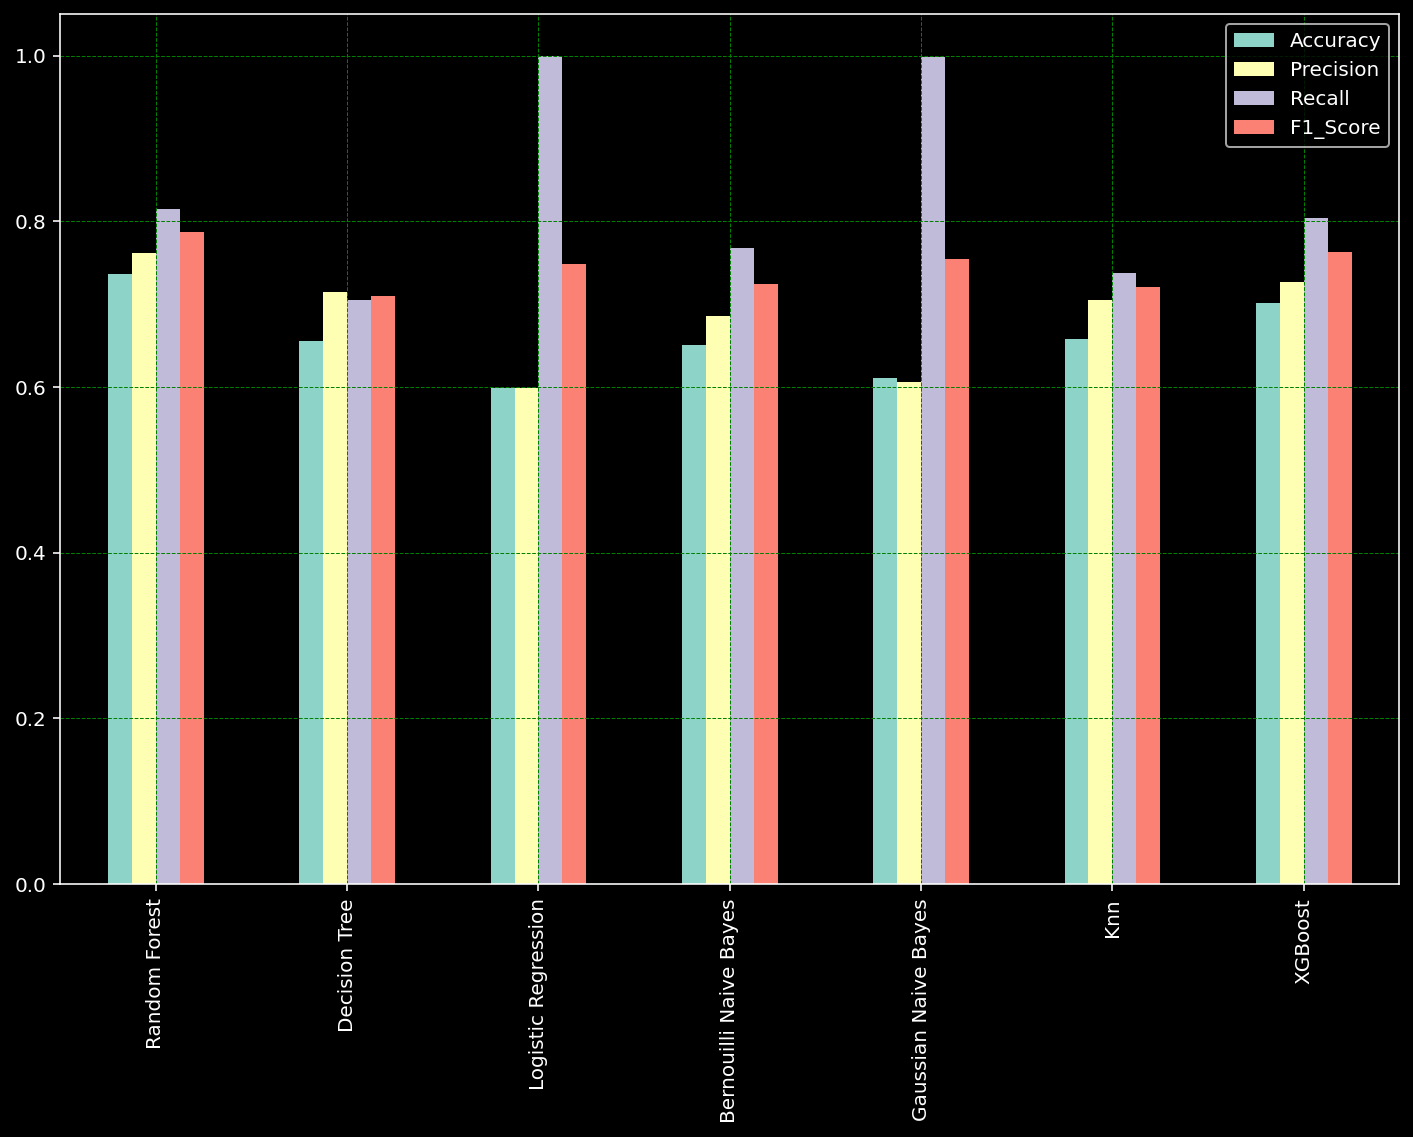

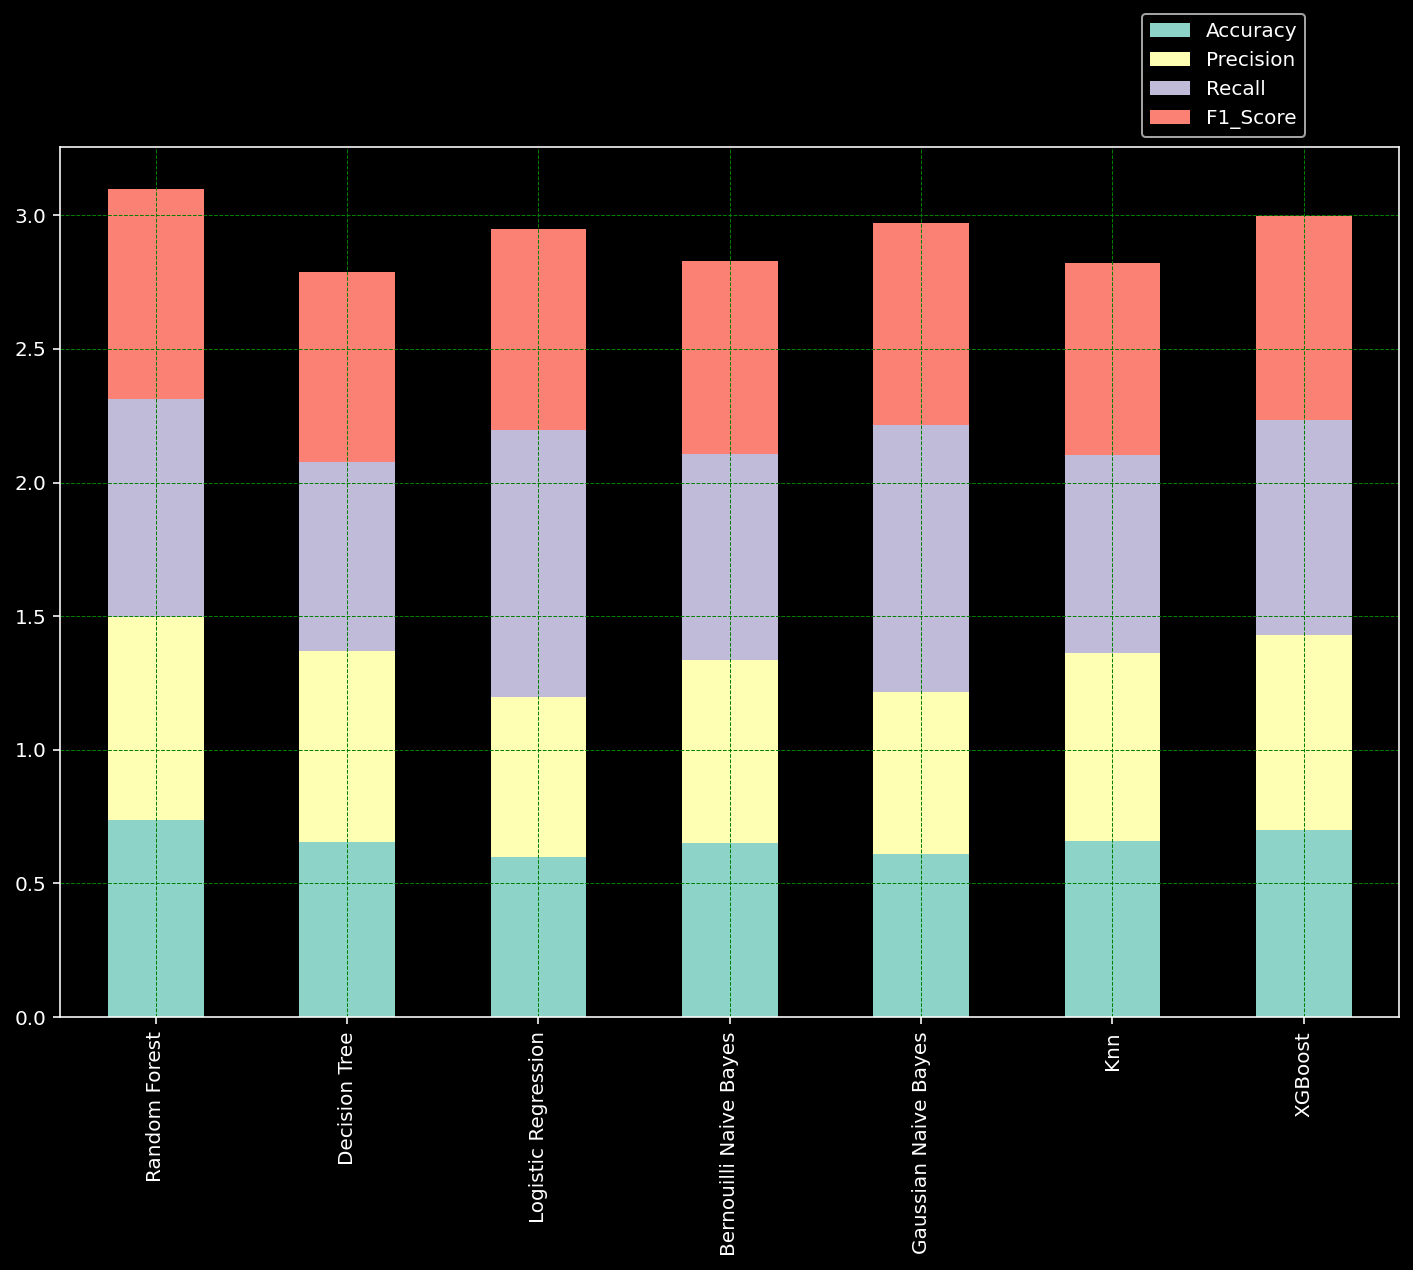

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

model_name=['Random Forest','Decision Tree','Logistic Regression','Bernouilli Naive Bayes','Gaussian Naive Bayes','Knn','XGBoost']
res={
    "Accuracy":[acc_rf,acc_dt,acc_log,acc_bnb,acc_gnb,acc_knn,acc_xgb],
    "Precision":[precision_rf,precision_dt,precision_log,precision_bnb,precision_gnb,precision_knn,precision_xgb],
    "Recall":[recall_rf,recall_dt,recall_log,recall_bnb,recall_gnb,recall_knn,recall_xgb],
    "F1_Score":[f1_rf,f1_dt,f1_log,f1_bnb,f1_gnb,f1_knn,f1_xgb],
}

df=pd.DataFrame(res,index=model_name)

df.plot(kind="bar",figsize=(12,8))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
df.plot(kind="bar",stacked=True,figsize=(12,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()


#model_name=['Random Forest','Decision Tree','Logistic Regression','Bernouilli Naive Bayes','Gaussian Naive Bayes','Knn','XGBoost']
#results

# Observations:
- As we can see that Random Forest and XGBoost are the best performing models
- We can see that Random Forest is giving us the best model accuracy of 74% along with best F1 score of 0.79 